<a href="https://colab.research.google.com/github/datascience-uniandes/hypothesis-testing-tutorial/blob/master/hypothesis-testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML - Supermercados Inteligentes

Univerisdad de los Andes MINE-4101: Applied Data Science  

- Lizeth Viviana Perdomo Castañeda
- David Esteban Fajardo Torres
  
**Dataset:** Dataset abierto de varios productos de mercado con sus etiquetas para identificar el tipo de productos. [dataset](https://github.com/marcusklasson/GroceryStoreDataset/tree/master/dataset).

**Business Context:** Los supermercados inteligentes están diseñados para mejorar todos los aspectos del proceso de compra, desde la entrada del cliente hasta la salida, utilizando tecnologías avanzadas para automatizar tareas, gestionar inventarios en tiempo real y analizar el comportamiento del consumidor.

Un nuevo supermercado inteligente, ha implementado tecnologías avanzadas como sensores y cámaras. Para iniciar la automatización de procesos, ahora necesita aprovechar mejor los datos generados a diario para tomar decisiones más informadas y eficaces.

El supermercado requiere el desarrollo de un sistema de automatización que permita a los clientes tomar productos y salir sin pasar por caja, mientras las cámaras y sensores registran automáticamente los artículos seleccionados.


In [1]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

### Carga y exploración del Dataset

In [3]:
base_dir = r'C:\Users\lperd\OneDrive - Universidad de los andes\MINE 2024-2\CIENCIA DE DATOS APLICADA\Talleres\Taller 2\Ciencia-de-datos.-Taller-2/new_dataset'

In [4]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

print(train_dir)


C:\Users\lperd\OneDrive - Universidad de los andes\MINE 2024-2\CIENCIA DE DATOS APLICADA\Talleres\Taller 2\Ciencia-de-datos.-Taller-2/new_dataset\train


In [5]:
# import shutil
# subdirs = ['train', 'val', 'test'] 
# for subdir in subdirs:
#     subdir_path = os.path.join(base_dir, subdir)  
#     for category in os.listdir(subdir_path):  
#         category_path = os.path.join(subdir_path, category)        
#         if os.path.isdir(category_path):             
#             for product in os.listdir(category_path): 
#                 product_path = os.path.join(category_path, product) 
#                 if os.path.isdir(product_path): 
#                     shutil.move(product_path, subdir_path) 

# Eliminar las carpetas de nivel superior 
#                     
#             os.rmdir(category_path)

In [6]:
# Aumento de datos solo para el conjunto de entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

In [7]:
test_val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Generadores de imágenes
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  
    batch_size=32,
    class_mode='categorical'
)

val_generator = test_val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_val_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

print(train_generator.class_indices)

Found 442 images belonging to 11 classes.
Found 57 images belonging to 11 classes.
Found 434 images belonging to 11 classes.
{'Asparagus': 0, 'Aubergine': 1, 'Avocado': 2, 'Banana': 3, 'Cabbage': 4, 'Carrots': 5, 'Cucumber': 6, 'Golden-Delicious': 7, 'Granny-Smith': 8, 'Pink-Lady': 9, 'Royal-Gala': 10}


In [9]:
def mostrar_imagenes(generator, num_images=5):
    x_batch, y_batch = next(generator)
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(x_batch[i])
        plt.axis('off')
    plt.show()

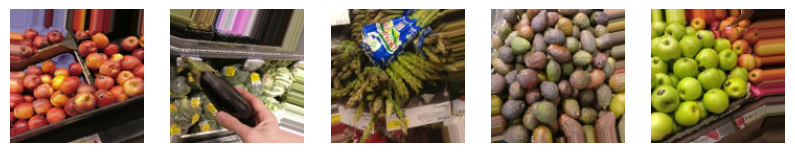

In [10]:
mostrar_imagenes(train_generator)

### Entrenamiento del modelo de Machine Learning

In [11]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 10

In [12]:
# Modelo CNN básico
def crear_modelo_baseline():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(train_generator.num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [13]:
# Entrenar el modelo CNN básico
modelo_baseline = crear_modelo_baseline()
history_baseline = modelo_baseline.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

c:\Users\lperd\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\lperd\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 455ms/step - accuracy: 0.1492 - loss: 2.3175 - val_accuracy: 0.2807 - val_loss: 1.9531
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 271ms/step - accuracy: 0.3088 - loss: 1.8223 - val_accuracy: 0.3509 - val_loss: 1.6253
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 271ms/step - accuracy: 0.3580 - loss: 1.5277 - val_accuracy: 0.3333 - val_loss: 1.6025
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 258ms/step - accuracy: 0.3656 - loss: 1.5470 - val_accuracy: 0.4561 - val_loss: 1.4238
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 263ms/step - accuracy: 0.4519 - loss: 1.3709 - val_accuracy: 0.3684 - val_loss: 1.3896
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 264ms/step - accuracy: 0.4729 - loss: 1.2169 - val_accuracy: 0.4211 - val_loss: 1.3071
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 264ms/step - accuracy: 0.5181 - loss: 1.1954 - val_accuracy: 0.6316 - val_loss: 1.1523
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 262ms/step - accuracy: 0.5701 - loss: 1.1566 - val_accuracy: 0.

In [14]:
# Modelo de Transfer Learning con MobileNetV2
def crear_modelo_transfer():
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
    base_model.trainable = False  # Congelar las capas de MobileNetV2
    
    model = Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(train_generator.num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [15]:
# Entrenar el modelo de Transfer Learning
modelo_transfer = crear_modelo_transfer()
history_transfer = modelo_transfer.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 385ms/step - accuracy: 0.2295 - loss: 2.5842 - val_accuracy: 0.5789 - val_loss: 1.1180
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 291ms/step - accuracy: 0.6444 - loss: 1.0643 - val_accuracy: 0.7895 - val_loss: 0.6690
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 292ms/step - accuracy: 0.7670 - loss: 0.7162 - val_accuracy: 0.8596 - val_loss: 0.5055
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 283ms/step - accuracy: 0.8241 - loss: 0.5240 - val_accuracy: 0.7895 - val_loss: 0.4893
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 278ms/step - accuracy: 0.8613 - loss: 0.4128 - val_accuracy: 0.8246 - val_loss: 0.4303
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 279ms/step - accuracy: 0.8974 - loss: 0.3306 - val_accuracy: 0.7895 - val_loss: 0.4364
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 285ms/step - accuracy: 0.8595 - loss: 0.3471 - val_accuracy: 0.8772 - val_loss: 0.3688
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 279ms/step - accuracy: 0.8925 - loss: 0.2755 - val_accuracy: 0.

### Evaluación de los modelos

In [16]:
print("Evaluación del modelo CNN básico:")
baseline_eval = modelo_baseline.evaluate(test_generator)

print("\nEvaluación del modelo Transfer Learning:")
transfer_eval = modelo_transfer.evaluate(test_generator)

Evaluación del modelo CNN básico:
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 263ms/step - accuracy: 0.5870 - loss: 0.8970

Evaluación del modelo Transfer Learning:
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step - accuracy: 0.8012 - loss: 0.6611


In [17]:
modelo_transfer.save('modelo_clasificacion_imagenes.keras')

In [18]:
modelo_transfer_cargado = tf.keras.models.load_model('modelo_clasificacion_imagenes.keras')

In [25]:
# Cargar la imagen
ruta_imagen = r'C:\Users\lperd\OneDrive - Universidad de los andes\MINE 2024-2\CIENCIA DE DATOS APLICADA\Talleres\Taller 2\GroceryStoreDataset\dataset\val\Banana\Banana_001.jpg'
image = tf.keras.preprocessing.image.load_img(ruta_imagen, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) / 255.0  # Convertir la imagen a batch y normalizar

# Verificar la forma del lote de entrada
print("Forma del lote de entrada:", input_arr.shape)

# Realizar la predicción
predictions = modelo_transfer_cargado.predict(input_arr)
result_index = np.argmax(predictions)  # Obtener índice del valor máximo
print("Categoría predicha:", result_index)


Forma del lote de entrada: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Categoría predicha: 3


In [ ]:
# ruta_imagen = r'C:\Users\Esteban\Documents\MINE\GroceryStoreDataset\dataset\test\Fruit\Plum\Plum_014.jpg'
# print(ruta_imagen)
# # Preprocesar la imagen
# img_preprocesada = preprocesar_imagen(ruta_imagen)
# print(img_preprocesada.shape)
# # Hacer la predicción
# prediccion = modelo_transfer_cargado.predict(img_preprocesada)
# 
# # Obtener el índice de la clase con mayor probabilidad
# clase_predicha = np.argmax(prediccion, axis=1)[0]
# print(np.argmax(prediccion, axis=1))
# print(f"Clase predicha: {clase_predicha}")
# 
# print(test_generator.class_names[clase_predicha])

In [ ]:
# Obtener las etiquetas de las clases
class_labels = list(test_generator.class_indices.keys())
print(class_labels)
# Función para realizar predicciones y generar etiquetas
def obtener_predicciones(model, generator):
    # Generar predicciones en el conjunto de prueba
    generator.reset()
    predictions = model.predict(generator, verbose=1)
    # Obtener índices de las clases predichas
    pred_indices = np.argmax(predictions, axis=1)
    # Obtener etiquetas reales e índices de clases reales
    true_indices = generator.classes
    true_labels = [class_labels[i] for i in true_indices]
    pred_labels = [class_labels[i] for i in pred_indices]
    return true_labels, pred_labels
 
# Validación del modelo CNN básico
print("Resultados del modelo CNN básico:")
true_labels_baseline, pred_labels_baseline = obtener_predicciones(modelo_baseline, test_generator)
print(classification_report(true_labels_baseline, pred_labels_baseline))
print(confusion_matrix(true_labels_baseline, pred_labels_baseline))
 
# Validación del modelo de Transfer Learning
print("\nResultados del modelo de Transfer Learning:")
true_labels_transfer, pred_labels_transfer = obtener_predicciones(modelo_transfer, test_generator)
print(classification_report(true_labels_transfer, pred_labels_transfer))
print(confusion_matrix(true_labels_transfer, pred_labels_transfer))
 
# Guardar etiquetas en un DataFrame
df_baseline = pd.DataFrame({
    'True Label': true_labels_baseline,
    'Predicted Label (CNN)': pred_labels_baseline
})
 
df_transfer = pd.DataFrame({
    'True Label': true_labels_transfer,
    'Predicted Label (Transfer Learning)': pred_labels_transfer
})
 
# Mostrar las primeras filas de las predicciones
print("\nPredicciones del modelo CNN básico:\n", df_baseline.head())
print("\nPredicciones del modelo de Transfer Learning:\n", df_transfer.head())

In [ ]:
class_labels = list(test_generator.class_indices.values())
print(class_labels)